# Data Science

## Task 2. Computer vision. Sentinel-2 image matching

In this task, you will work on the algorithm (or model) for matching satellite images. For the
dataset creation, you can download Sentinel-2 images from the official source [here](https://dataspace.copernicus.eu/browser/) or use our
dataset from [Kaggle](https://www.kaggle.com/datasets/isaienkov/deforestation-in-ukraine). Your algorithm should work with images from different seasons. For this
purpose you need:

* Prepare a dataset for keypoints detection and image matching (in case of using the ML approach).
* Build / train the algorithm.
* Prepare demo code / notebook of the inference results

**In this Jupiter Notebook, we have taken images of a certain habitat for 3 different seasons from this [page](https://dataspace.copernicus.eu/browser/?zoom=15&lat=50.88576&lng=34.80155&themeId=DEFAULT-THEME&visualizationUrl=https%3A%2F%2Fsh.dataspace.copernicus.eu%2Fogc%2Fwms%2Fa91f72b5-f393-4320-bc0f-990129bd9e63&datasetId=S2_L2A_CDAS&fromTime=2023-05-14T00%3A00%3A00.000Z&toTime=2023-05-14T23%3A59%3A59.999Z&layerId=2_TONEMAPPED_NATURAL_COLOR&demSource3D="MAPZEN"&cloudCoverage=32).**

In [1]:
# Import the required libraries
import os
import cv2
import matplotlib
import matplotlib.pyplot as plt

In [2]:
print(cv2.__version__)
print(matplotlib.__version__)

4.7.0
3.7.2


In this code, we read an image from a specific folder, converted it to grayscale, used the SIFT keypoint detector to identify keypoints and their descriptors, then visualized the keypoints found on the image and displayed the result using the matplotlib library.

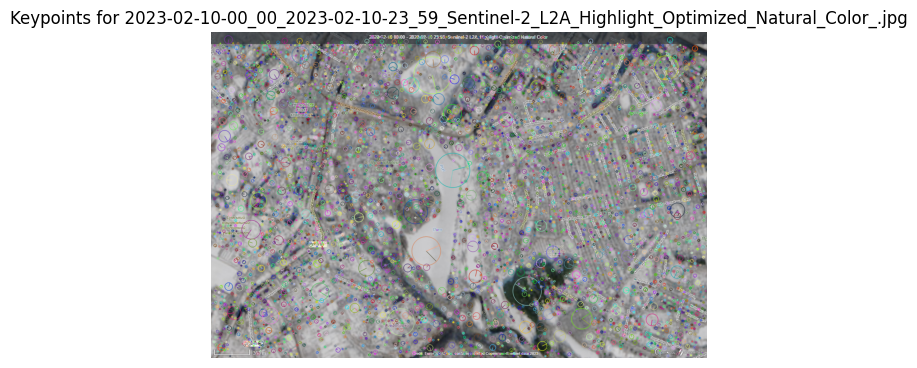

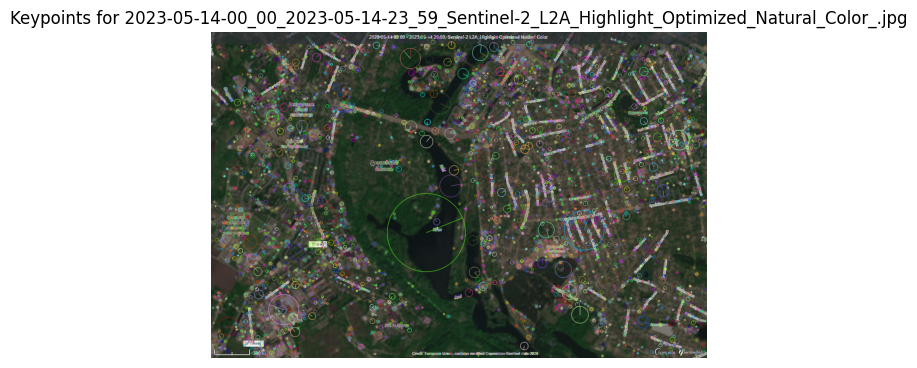

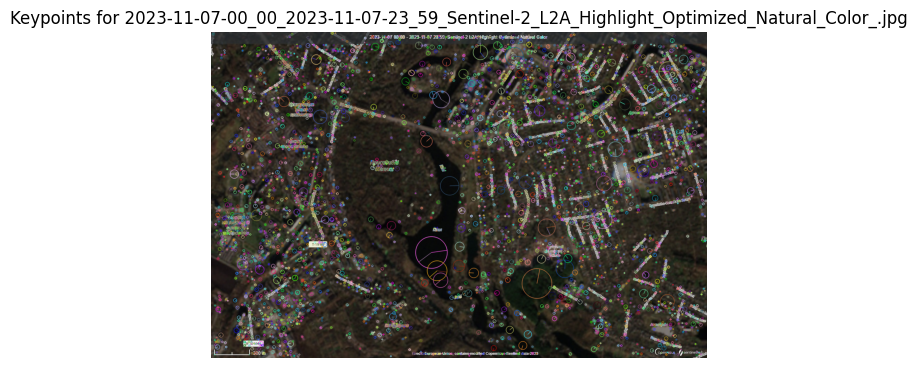

In [3]:
# Path to the folder with images
image_folder_path = 'C:/Users/Admin/Test_task/Task_2/data/new'

# Initializing the SIFT detector
sift = cv2.SIFT_create()

# A loop to process each image in a folder
for filename in os.listdir(image_folder_path):
    if filename.endswith(".jpg") or filename.endswith(".jpeg"):  # Перевірка, чи файл є зображенням
        # Read the image
        image_path = os.path.join(image_folder_path, filename)
        image = cv2.imread(image_path)

        # Convert to grayscale
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Finding key points and their descriptors
        keypoints, descriptors = sift.detectAndCompute(gray_image, None)

        # Visualize key points in the image
        image_with_keypoints = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

        # Visualize images with key points
        plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))
        plt.title(f'Keypoints for {filename}')
        plt.axis('off')
        plt.show()

In this code, we took all possible pairs of images from a folder, using SIFT to find the key points and their descriptors for each image, and then used BFMatcher to find close matches between the descriptors of these images. Matches that satisfy a certain distance threshold are considered "good". Next, we visualize the images and mark the "good" matches between them using the drawMatches function.

Thus, this code uses a large number of computer vision tools to compare pairs of images, identify key points, and find matches.

Pair: 2023-02-10-00_00_2023-02-10-23_59_Sentinel-2_L2A_Highlight_Optimized_Natural_Color_.jpg,
      2023-05-14-00_00_2023-05-14-23_59_Sentinel-2_L2A_Highlight_Optimized_Natural_Color_.jpg


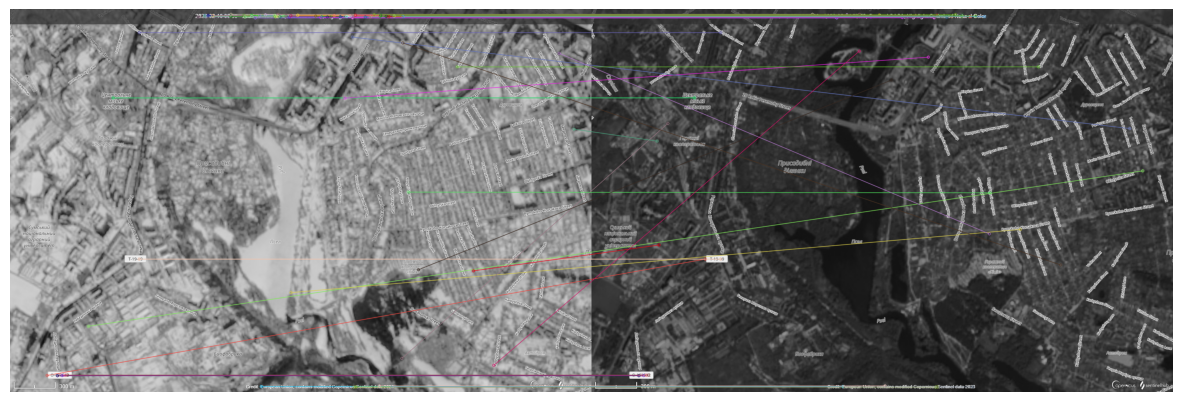

Pair: 2023-02-10-00_00_2023-02-10-23_59_Sentinel-2_L2A_Highlight_Optimized_Natural_Color_.jpg,
      2023-11-07-00_00_2023-11-07-23_59_Sentinel-2_L2A_Highlight_Optimized_Natural_Color_.jpg


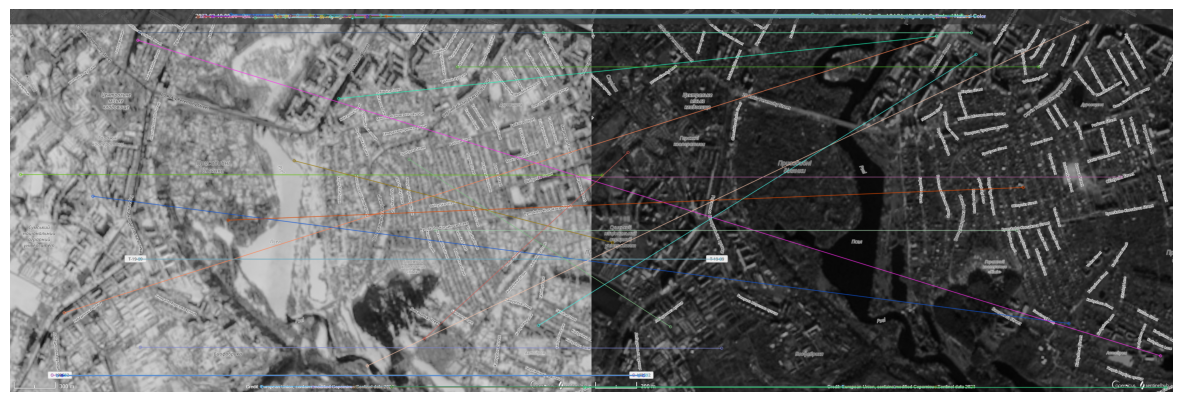

Pair: 2023-05-14-00_00_2023-05-14-23_59_Sentinel-2_L2A_Highlight_Optimized_Natural_Color_.jpg,
      2023-11-07-00_00_2023-11-07-23_59_Sentinel-2_L2A_Highlight_Optimized_Natural_Color_.jpg


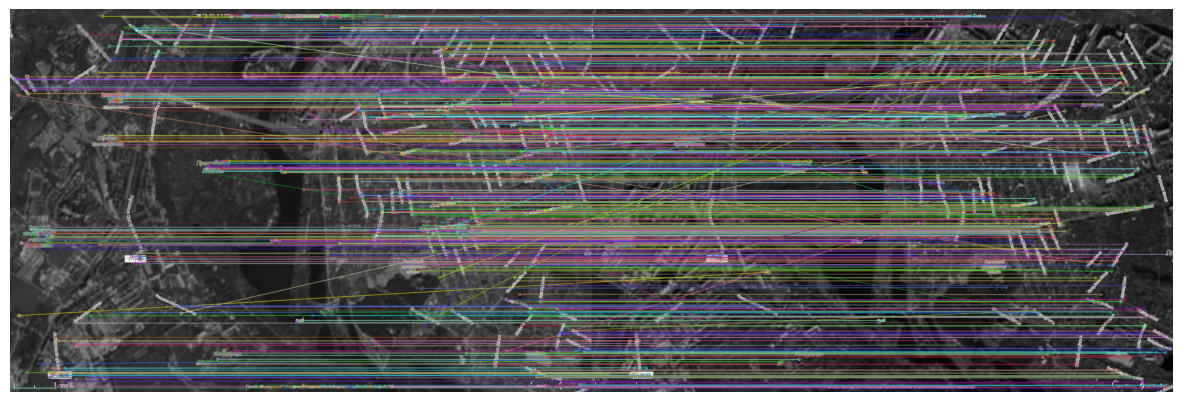

In [4]:
# Path to the folder with images
image_folder_path = 'C:/Users/Admin/Test_task/Task_2/data/new'

# Initializing the SIFT detector
sift = cv2.SIFT_create()

# Create all possible image pairs in a folder
image_paths = [os.path.join(image_folder_path, filename) for filename in os.listdir(image_folder_path) if filename.endswith(('.jpg', '.jpeg'))]
image_pairs = [(image_paths[i], image_paths[j]) for i in range(len(image_paths)) for j in range(i + 1, len(image_paths))]

# A loop for processing each pair of images
for image1_path, image2_path in image_pairs:
    # Read two images for comparison
    image1 = cv2.imread(image1_path, cv2.IMREAD_GRAYSCALE)
    image2 = cv2.imread(image2_path, cv2.IMREAD_GRAYSCALE)

    # Find key points and descriptors for both images
    keypoints1, descriptors1 = sift.detectAndCompute(image1, None)
    keypoints2, descriptors2 = sift.detectAndCompute(image2, None)

    # Creating a BFMatcher object (Brute Force Matcher) to find close matches
    bf = cv2.BFMatcher()

    # Finding close matches with BFMatcher
    matches = bf.knnMatch(descriptors1, descriptors2, k=2)

    # Selecting good matches using distance ratios
    good_matches = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            good_matches.append(m)

    # Create a new large window for visualization
    plt.figure(figsize=(15, 15))

    # Visualize images with good matches marked
    img_matches = cv2.drawMatches(image1, keypoints1, image2, keypoints2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    # Print signature with file names
    print(f'Pair: {os.path.basename(image1_path)},\n      {os.path.basename(image2_path)}')
    
    # Visualize the result in Jupyter Notebook
    plt.imshow(img_matches), plt.axis('off'), plt.show()
